In [51]:
import pandas as pd

# Read the .csv file
df = pd.read_csv('../data/cleaned/appended_data.csv')

# Filter the rows where Postal Code is not a 4-digit number
invalid_postal_codes = df[~df['Postal Code'].astype(str).str.match(r'^\d{4}$')]

# Delete the rows with invalid Postal Codes
df = df.drop(invalid_postal_codes.index)

# Save the updated DataFrame as a new file
df.to_csv('rawdata2.csv', index=False)


**Time to mess with our data**

In [5]:
import pandas as pd
import plotly.graph_objects as go

# Read the .csv file
data = pd.read_csv("../data/cleaned/properties.csv")

# Filter the dataframe to include only numeric columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis'))

# Set the title and axis labels
fig.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')

# Show the plot
fig.show()

In [6]:
missing_proportion = data.isnull().mean()
missing_proportion_sorted = missing_proportion.sort_values(ascending=False) * 100
print(missing_proportion_sorted)


cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
latitude                          18.670128
longitude                         18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
fl_floodzone                       0.000000
state_building                     0.000000
fl_terrace                         0.000000
epc                                0.000000
heating_type                       0.000000
fl_double_glazing                  0.000000
fl_swimming_pool                   0.000000
fl_garden                          0.000000
id                                 0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
price                              0.000000
nbr_bedrooms                    

In [9]:
missing_lines = data[data['region'] == 'MISSING']
data = data.drop(missing_lines.index)


In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(
    transform="pandas"
)
ohetransform = ohe.fit_transform(data[["region"]])
ohetransform
df2 = pd.concat([data, ohetransform], axis=1).drop("region", axis=1)
df2

,id,price,property_type,subproperty_type,province,locality,zip_code,latitude,longitude,construction_year,...,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,region_Brussels-Capital,region_Flanders,region_Wallonia
0,34221000,225000.0,APARTMENT,APARTMENT,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,...,0,MISSING,231.0,C,GAS,1,922.0,0.0,1.0,0.0
1,2104000,449000.0,HOUSE,HOUSE,East Flanders,Gent,9185,51.174944,3.845248,NaN,...,0,MISSING,221.0,C,MISSING,1,406.0,0.0,1.0,0.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels,Brussels,1070,50.842043,4.334543,NaN,...,1,AS_NEW,NaN,MISSING,GAS,0,NaN,1.0,0.0,0.0
3,58496000,501000.0,HOUSE,HOUSE,Antwerp,Turnhout,2275,51.238312,4.817192,2024.0,...,1,MISSING,99.0,A,MISSING,0,NaN,0.0,1.0,0.0
4,48727000,982700.0,APARTMENT,DUPLEX,Walloon Brabant,Nivelles,1410,NaN,NaN,2022.0,...,0,AS_NEW,19.0,A+,GAS,0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75506,30785000,210000.0,APARTMENT,APARTMENT,Hainaut,Tournai,7640,NaN,NaN,2023.0,...,1,AS_NEW,NaN,MISSING,MISSING,1,NaN,0.0,0.0,1.0
75507,13524000,780000.0,APARTMENT,PENTHOUSE,Brussels,Brussels,1200,50.840183,4.435570,NaN,...,0,AS_NEW,95.0,B,GAS,1,NaN,1.0,0.0,0.0
75508,43812000,798000.0,HOUSE,MIXED_USE_BUILDING,Brussels,Brussels,1080,NaN,NaN,NaN,...,1,TO_RENOVATE,351.0,G,GAS,0,NaN,1.0,0.0,0.0
75509,49707000,575000.0,HOUSE,VILLA,West Flanders,Veurne,8670,NaN,NaN,1990.0,...,1,AS_NEW,269.0,C,GAS,1,795.0,0.0,1.0,0.0


In [22]:
# Filter the dataframe to include only numeric columns
numeric_df = df2.select_dtypes(include=["int64", "float64"])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale="Viridis",
    )
)

# Set the title and axis labels
fig.update_layout(
    title="Correlation Matrix", xaxis_title="Features", yaxis_title="Features"
)

# Show the plot
fig.show()

In [20]:
data = data[data['latitude'] >= 49]
data = data[data["latitude"] <= 52]

<Axes: xlabel='latitude', ylabel='longitude'>

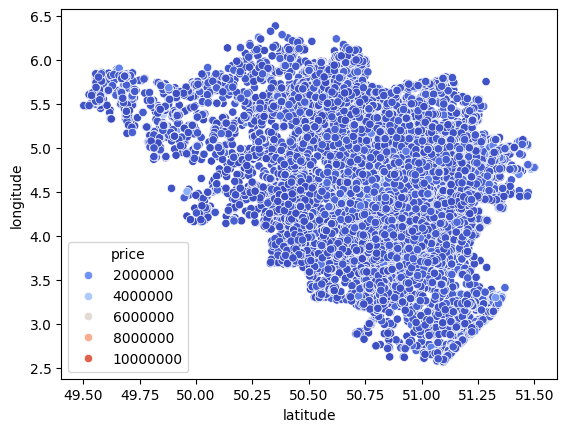

In [29]:
import seaborn as sns
sns.scatterplot(data=data, x='latitude', y='longitude', hue='price', palette='coolwarm')


In [86]:
columns_to_drop = ['Kitchen Surface', 'Living Surface', 'Heating Type', 'Toilet Count', 'Bathroom Count', 'ID', 'Kitchen', 'Furnished', 'Openfire', 'Fireplace Count', 'Terrace', 'Garden Exists', 'Cadastral Income', 'Consumption Per m2', 'Price per sqm']
df2 = data.drop(columns_to_drop, axis=1, errors='ignore')
missing_proportion = df2.isnull().mean()
missing_proportion_sorted = missing_proportion.sort_values(ascending=False) * 100
print(missing_proportion_sorted)

# Filter the dataframe to include only numeric columns
numeric_df = df2.select_dtypes(include=["int64", "float64"])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale="Viridis",
    )
)

# Set the title and axis labels
fig.update_layout(
    title="Correlation Matrix", xaxis_title="Features", yaxis_title="Features"
)

# Show the plot
fig.show()

State of Building    33.120081
EPC                  32.599991
Build Year           28.158512
Kitchen Type         27.877756
Facades              26.294472
Terrace Surface      14.778847
Habitable Surface     4.100888
Garden Surface        2.669490
Room Count            1.224283
Bedroom Count         0.501680
Province              0.023013
Municipality          0.023013
Subtype               0.004603
Price                 0.004603
Locality              0.000000
Swimming Pool         0.000000
Postal Code           0.000000
Sale Type             0.000000
Type                  0.000000
Region                0.000000
dtype: float64


In [83]:
df2 = df2[df2['Region'] != 'Unknown']


In [87]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohetransform = ohe.fit_transform(df2[["Region"]])
ohetransform

,Region_Brussels,Region_Flanders,Region_Unknown,Region_Wallonia
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
21722,0.0,1.0,0.0,0.0
21723,0.0,1.0,0.0,0.0
21724,0.0,0.0,0.0,1.0
21725,0.0,1.0,0.0,0.0


In [88]:
df3 = pd.concat([df2, ohetransform], axis=1).drop("Region", axis=1)

# Filter the dataframe to include only numeric columns
numeric_df = df3.select_dtypes(include=["int64", "float64"])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale="Viridis",
    )
)

# Set the title and axis labels
fig.update_layout(
    title="Correlation Matrix", xaxis_title="Features", yaxis_title="Features"
)

# Show the plot
fig.show()

In [89]:
missing_proportion = numeric_df.isnull().mean()
missing_proportion_sorted = missing_proportion.sort_values(ascending=False) * 100
print(missing_proportion_sorted)

correlation_matrix = numeric_df.corr()

correlation_with_price = correlation_matrix['Price'].drop('Price')

correlation_with_price_sorted = correlation_with_price.sort_values(ascending=False)

print(correlation_with_price_sorted)

State of Building    33.120081
EPC                  32.599991
Build Year           28.158512
Kitchen Type         27.877756
Facades              26.294472
Terrace Surface      14.778847
Habitable Surface     4.100888
Garden Surface        2.669490
Room Count            1.224283
Bedroom Count         0.501680
Price                 0.004603
Region_Flanders       0.000000
Region_Unknown        0.000000
Postal Code           0.000000
Region_Brussels       0.000000
Swimming Pool         0.000000
Region_Wallonia       0.000000
dtype: float64
Room Count           0.499609
Habitable Surface    0.431109
Bedroom Count        0.353424
Kitchen Type         0.227418
Swimming Pool        0.173004
Terrace Surface      0.154114
Region_Brussels      0.120032
State of Building    0.119868
Facades              0.095102
Garden Surface       0.084277
Region_Flanders      0.053504
Region_Unknown       0.048156
Build Year           0.004239
Postal Code         -0.072529
EPC                 -0.081413
Region_W

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Build Year'}>,
        <Axes: title={'center': 'Facades'}>,
        <Axes: title={'center': 'Habitable Surface'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Bedroom Count'}>,
        <Axes: title={'center': 'Room Count'}>,
        <Axes: title={'center': 'Kitchen'}>,
        <Axes: title={'center': 'Kitchen Type'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Openfire'}>,
        <Axes: title={'center': 'Fireplace Count'}>,
        <Axes: title={'center': 'Terrace'}>,
        <Axes: title={'center': 'Terrace Surface'}>],
       [<Axes: title={'center': 'Garden Exists'}>,
        <Axes: title={'center': 'Garden Surface'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'State of Building'}>,
        <Axes: title={'center': 'EPC'}>],
       [<Axes: title={'cente

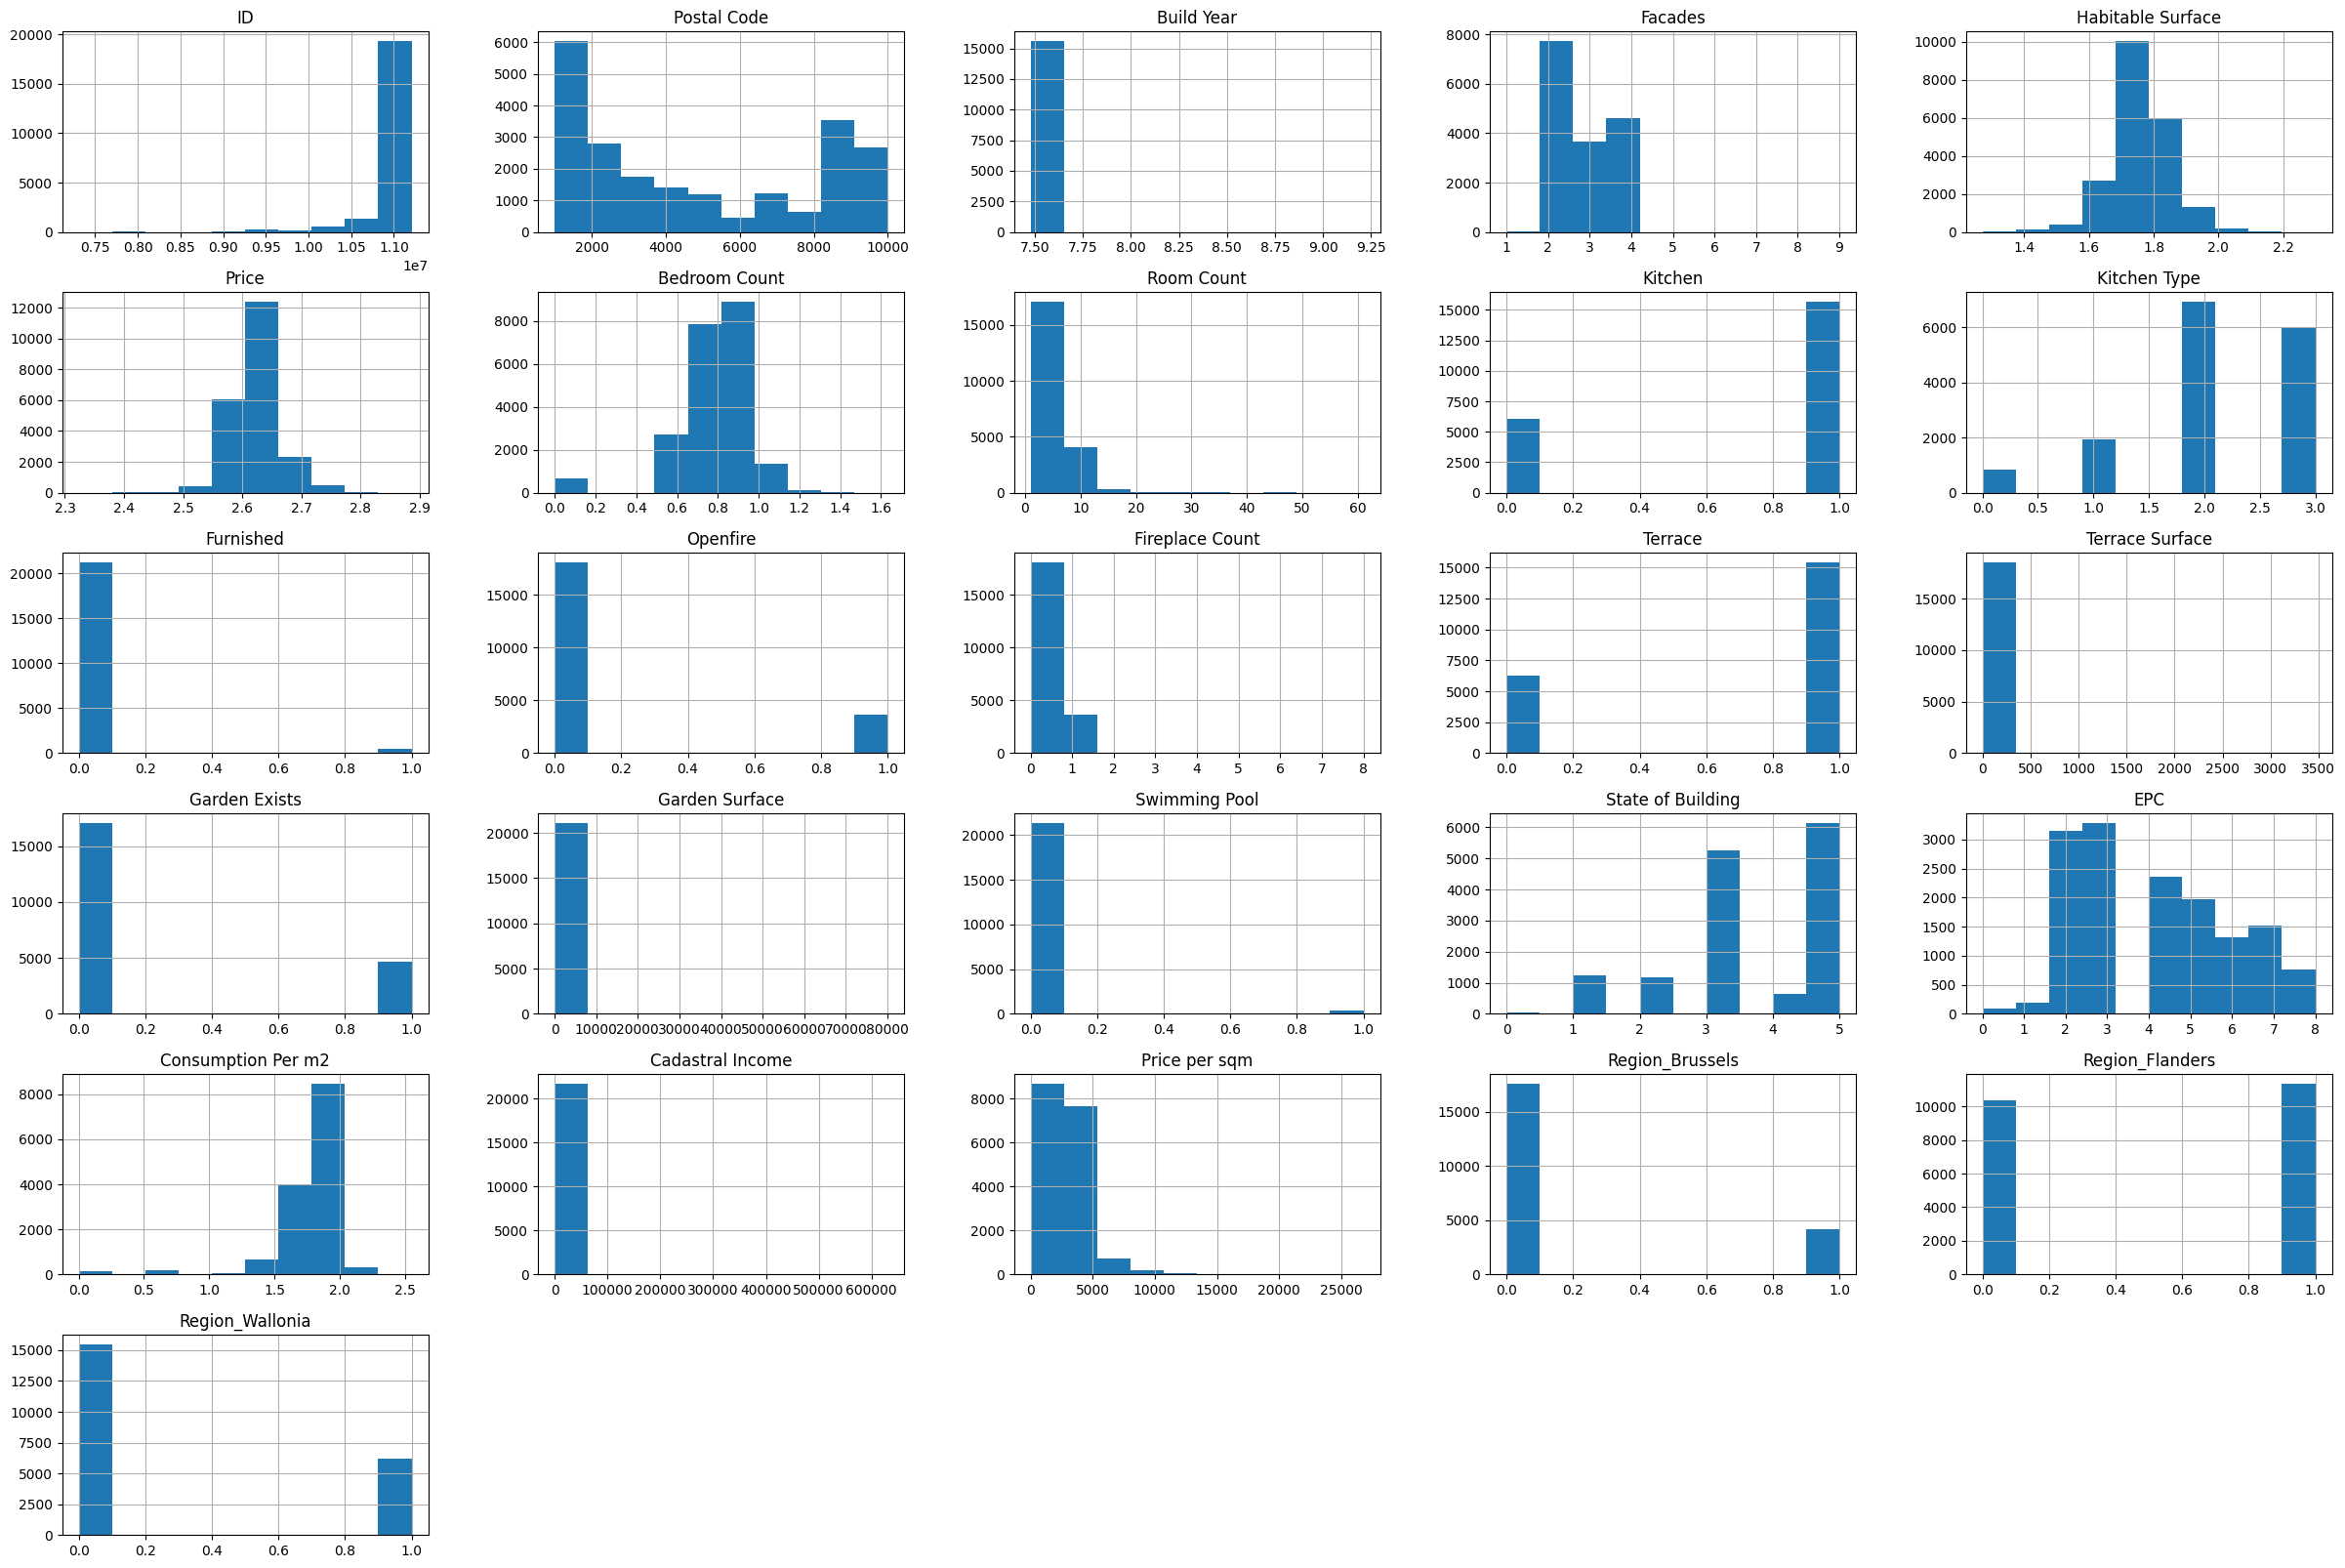

In [36]:
import numpy as np
df3["Habitable Surface"] = np.log(df3["Habitable Surface"] + 1)
df3["Bedroom Count"] = np.log(df3["Bedroom Count"] + 1)
df3["Consumption Per m2"] = np.log(df3["Consumption Per m2"] + 1)
df3["Price"] = np.log(df3["Price"] + 1)
df3["Build Year"] = np.log(df3["Build Year"] + 1)
df3.hist(figsize=(30,20))

In [27]:
dataframe = df3.loc[:, ['Price', 'Habitable Surface', 'Room Count', 'State of Building', 'Kitchen Type', 'Region_Flanders', 'Region_Brussels', 'Region_Wallonia']]
X = dataframe.drop('Price', axis=1)
y = dataframe['Price']
X.shape, y.shape

((21722, 7), (21722,))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17377, 7), (4345, 7), (17377,), (4345,))

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [30]:
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = regression.intercept_

print(f'R^2: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'Intercept: {intercept:.2f}')

R^2: 0.37
MSE: 83999127231.35
MAE: 150169.58
Intercept: -234806.98


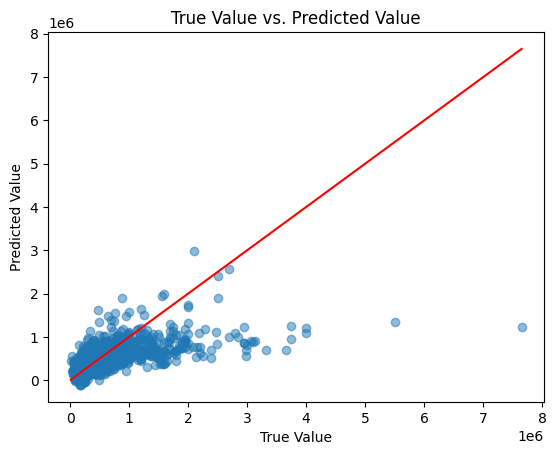

In [102]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True Value vs. Predicted Value')
plt.show()

Text(0.5, 1.0, 'Predicted Value vs. Residuals')

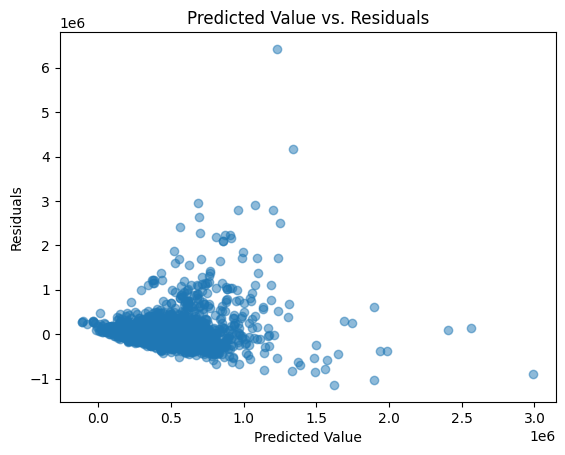

In [104]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Predicted Value vs. Residuals')

In [112]:
from sklearn.preprocessing import StandardScaler
dataframe1 = data.loc[:, ['Price', 'Habitable Surface', 'Room Count', 'State of Building', 'Kitchen Type']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe1)
frame1 = pd.DataFrame(data=scaled_data, columns=dataframe1.columns)
frame1.head()

,Price,Habitable Surface,Room Count,State of Building,Kitchen Type
0,-0.538964,-0.240132,0.351469,-0.596208,-0.21318
1,-0.232746,-0.085528,0.351469,-0.596208,-0.21318
2,0.168681,-0.085528,-0.018843,-0.596208,-0.21318
3,-0.654760,-0.443559,-0.389154,-0.596208,-0.21318
4,-0.361409,-0.524930,-0.018843,-0.596208,-0.21318


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


regression = LinearRegression()
X = frame1.drop('Price', axis=1)
y = frame1['Price']
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = regression.intercept_

print(f'R^2: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'Intercept: {intercept:.2f}')

R^2: 0.37
MSE: 0.48
MAE: 0.37
Intercept: 0.00
